### ETS Machine Learning

Pada projek  kali ini akan dilakukan analisis mengenai pembuktian bahwa penyakit cacar monyet atau *Monkeypox* tidak terkait dengan vaksin AstraZenecca melainkan disebabkan oleh faktor-faktor lain yang relevan.
Analisis pada projek ini menggunakan metode *Supervised Learning* yakni dengan *Regression Method* berupa *Multiple Linear Regression*, *Support Vector Regression*, dan *Decision Tree*.


*    **Data Pre-Processing**

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.model_selection import train_test_split #untuk splitting data
from sklearn.linear_model import LinearRegression #untuk buat prediksi linearRegression
from sklearn.metrics import mean_squared_error # for calculating the cost function
from sklearn.svm import SVR #svr model
from sklearn.tree import DecisionTreeRegressor # for building the model
from sklearn.preprocessing import StandardScaler


from sklearn import metrics #untuk mengukur performa model
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:

# load dataset into pandas
df = pd.read_csv('Data Cacar Monyet.csv')
df.head(5)

,iso_code,continent,location,date,total_cases,reproduction_rate,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,BHR,Asia,Bahrain,1/1/2022,282062.0,2.04,5477.0,540.0,0.037,30.18,...,37.6,NaN,2.0,77.29,0.852,1472237,NaN,NaN,NaN,NaN
1,BHR,Asia,Bahrain,1/2/2022,282677.0,2.02,4833.0,484.0,0.033,30.17,...,37.6,NaN,2.0,77.29,0.852,1472237,NaN,NaN,NaN,NaN
2,BHR,Asia,Bahrain,1/3/2022,283344.0,2.02,4571.0,471.0,0.032,30.16,...,37.6,NaN,2.0,77.29,0.852,1472237,NaN,NaN,NaN,NaN
3,BHR,Asia,Bahrain,1/4/2022,284224.0,2.00,4276.0,447.0,0.030,30.16,...,37.6,NaN,2.0,77.29,0.852,1472237,NaN,NaN,NaN,NaN
4,BHR,Asia,Bahrain,1/5/2022,285448.0,1.96,4094.0,439.0,0.030,30.15,...,37.6,NaN,2.0,77.29,0.852,1472237,NaN,NaN,NaN,NaN


In [ ]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases',
       'reproduction_rate', 'new_vaccinations_smoothed_per_million',
       'new_people_vaccinated_smoothed',
       'new_people_vaccinated_smoothed_per_hundred', 'stringency_index',
       'population_density', 'median_age', 'aged_65_older', 'aged_70_older',
       'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate',
       'diabetes_prevalence', 'female_smokers', 'male_smokers',
       'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index', 'population',
       'excess_mortality_cumulative_absolute', 'excess_mortality_cumulative',
       'excess_mortality', 'excess_mortality_cumulative_per_million'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5913 entries, 0 to 5912
Data columns (total 29 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   iso_code                                    5913 non-null   object 
 1   continent                                   5913 non-null   object 
 2   location                                    5913 non-null   object 
 3   date                                        5913 non-null   object 
 4   total_cases                                 5904 non-null   float64
 5   reproduction_rate                           3504 non-null   float64
 6   new_vaccinations_smoothed_per_million       4048 non-null   float64
 7   new_people_vaccinated_smoothed              4144 non-null   float64
 8   new_people_vaccinated_smoothed_per_hundred  4144 non-null   float64
 9   stringency_index                            3456 non-null   float64
 10  population_d

In [ ]:
df.nunique()

iso_code                                        24
continent                                        1
location                                        24
date                                           252
total_cases                                   4554
reproduction_rate                              256
new_vaccinations_smoothed_per_million         1868
new_people_vaccinated_smoothed                2270
new_people_vaccinated_smoothed_per_hundred     240
stringency_index                               511
population_density                              24
median_age                                      21
aged_65_older                                   24
aged_70_older                                   24
gdp_per_capita                                  24
extreme_poverty                                 11
cardiovasc_death_rate                           24
diabetes_prevalence                             23
female_smokers                                  18
male_smokers                   

In [ ]:
round(df.isnull().sum()/df.shape[0]*100, 2)

iso_code                                       0.00
continent                                      0.00
location                                       0.00
date                                           0.00
total_cases                                    0.15
reproduction_rate                             40.74
new_vaccinations_smoothed_per_million         31.54
new_people_vaccinated_smoothed                29.92
new_people_vaccinated_smoothed_per_hundred    29.92
stringency_index                              41.55
population_density                             0.00
median_age                                     0.00
aged_65_older                                  0.00
aged_70_older                                  0.00
gdp_per_capita                                 0.00
extreme_poverty                               33.28
cardiovasc_death_rate                          0.00
diabetes_prevalence                            0.00
female_smokers                                 4.16
male_smokers

In [ ]:
df = df.drop(['iso_code', 'continent', 'date','reproduction_rate','population_density','stringency_index','gdp_per_capita','extreme_poverty','handwashing_facilities','excess_mortality_cumulative_absolute', 'excess_mortality_cumulative','excess_mortality', 'excess_mortality_cumulative_per_million'],axis=1)

In [ ]:
df=df.dropna(subset=['total_cases','female_smokers','male_smokers'])

In [ ]:
round(df.isnull().sum()/df.shape[0]*100, 2)

location                                       0.00
total_cases                                    0.00
new_vaccinations_smoothed_per_million         30.29
new_people_vaccinated_smoothed                28.60
new_people_vaccinated_smoothed_per_hundred    28.60
median_age                                     0.00
aged_65_older                                  0.00
aged_70_older                                  0.00
cardiovasc_death_rate                          0.00
diabetes_prevalence                            0.00
female_smokers                                 0.00
male_smokers                                   0.00
hospital_beds_per_thousand                     0.00
life_expectancy                                0.00
human_development_index                        0.00
population                                     0.00
dtype: float64

In [ ]:
df.nunique()

location                                        23
total_cases                                   4509
new_vaccinations_smoothed_per_million         1850
new_people_vaccinated_smoothed                2225
new_people_vaccinated_smoothed_per_hundred     240
median_age                                      20
aged_65_older                                   23
aged_70_older                                   23
cardiovasc_death_rate                           23
diabetes_prevalence                             22
female_smokers                                  18
male_smokers                                    23
hospital_beds_per_thousand                      20
life_expectancy                                 23
human_development_index                         21
population                                      23
dtype: int64

In [ ]:
print("Mean of new_vaccinations_smoothed_per_million")
mean_new_vaccinations_smoothed_per_million = df['new_vaccinations_smoothed_per_million'].mean()
df['new_vaccinations_smoothed_per_million'] = df['new_vaccinations_smoothed_per_million'].fillna(mean_new_vaccinations_smoothed_per_million)
mean_new_vaccinations_smoothed_per_million

Mean of new_vaccinations_smoothed_per_million


<ipython-input-12-618512c720cf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['new_vaccinations_smoothed_per_million'] = df['new_vaccinations_smoothed_per_million'].fillna(mean_new_vaccinations_smoothed_per_million)


1412.5565415821502

In [ ]:
print("Mean of new_people_vaccinated_smoothed")
mean_new_people_vaccinated_smoothed = df['new_people_vaccinated_smoothed'].mean()
df['new_people_vaccinated_smoothed'] = df['new_people_vaccinated_smoothed'].fillna(mean_new_people_vaccinated_smoothed)
mean_new_people_vaccinated_smoothed

Mean of new_people_vaccinated_smoothed


<ipython-input-13-dfdb53171dd8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['new_people_vaccinated_smoothed'] = df['new_people_vaccinated_smoothed'].fillna(mean_new_people_vaccinated_smoothed)


48481.11039603961

In [ ]:
print("Mean of new_people_vaccinated_smoothed_per_hundred")
mean_new_people_vaccinated_smoothed_per_hundred = df['new_people_vaccinated_smoothed_per_hundred'].mean()
df['new_people_vaccinated_smoothed_per_hundred'] = df['new_people_vaccinated_smoothed_per_hundred'].fillna(mean_new_people_vaccinated_smoothed_per_hundred)
mean_new_people_vaccinated_smoothed_per_hundred

Mean of new_people_vaccinated_smoothed_per_hundred


<ipython-input-14-636226c0cf23>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['new_people_vaccinated_smoothed_per_hundred'] = df['new_people_vaccinated_smoothed_per_hundred'].fillna(mean_new_people_vaccinated_smoothed_per_hundred)


0.025814603960396042

In [ ]:
df.head()

,location,total_cases,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,median_age,aged_65_older,aged_70_older,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index,population
0,Bahrain,282062.0,5477.0,540.0,0.037,32.4,2.372,1.387,151.689,16.52,5.8,37.6,2.0,77.29,0.852,1472237
1,Bahrain,282677.0,4833.0,484.0,0.033,32.4,2.372,1.387,151.689,16.52,5.8,37.6,2.0,77.29,0.852,1472237
2,Bahrain,283344.0,4571.0,471.0,0.032,32.4,2.372,1.387,151.689,16.52,5.8,37.6,2.0,77.29,0.852,1472237
3,Bahrain,284224.0,4276.0,447.0,0.030,32.4,2.372,1.387,151.689,16.52,5.8,37.6,2.0,77.29,0.852,1472237
4,Bahrain,285448.0,4094.0,439.0,0.030,32.4,2.372,1.387,151.689,16.52,5.8,37.6,2.0,77.29,0.852,1472237


In [ ]:
round(df.isnull().sum()/df.shape[0]*100, 2)

location                                      0.0
total_cases                                   0.0
new_vaccinations_smoothed_per_million         0.0
new_people_vaccinated_smoothed                0.0
new_people_vaccinated_smoothed_per_hundred    0.0
median_age                                    0.0
aged_65_older                                 0.0
aged_70_older                                 0.0
cardiovasc_death_rate                         0.0
diabetes_prevalence                           0.0
female_smokers                                0.0
male_smokers                                  0.0
hospital_beds_per_thousand                    0.0
life_expectancy                               0.0
human_development_index                       0.0
population                                    0.0
dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5658 entries, 0 to 5912
Data columns (total 16 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   location                                    5658 non-null   object 
 1   total_cases                                 5658 non-null   float64
 2   new_vaccinations_smoothed_per_million       5658 non-null   float64
 3   new_people_vaccinated_smoothed              5658 non-null   float64
 4   new_people_vaccinated_smoothed_per_hundred  5658 non-null   float64
 5   median_age                                  5658 non-null   float64
 6   aged_65_older                               5658 non-null   float64
 7   aged_70_older                               5658 non-null   float64
 8   cardiovasc_death_rate                       5658 non-null   float64
 9   diabetes_prevalence                         5658 non-null   float64
 10  female_smoke

# **EXPLORATORY DATA**

<ipython-input-18-627fac266514>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df = df.corr()


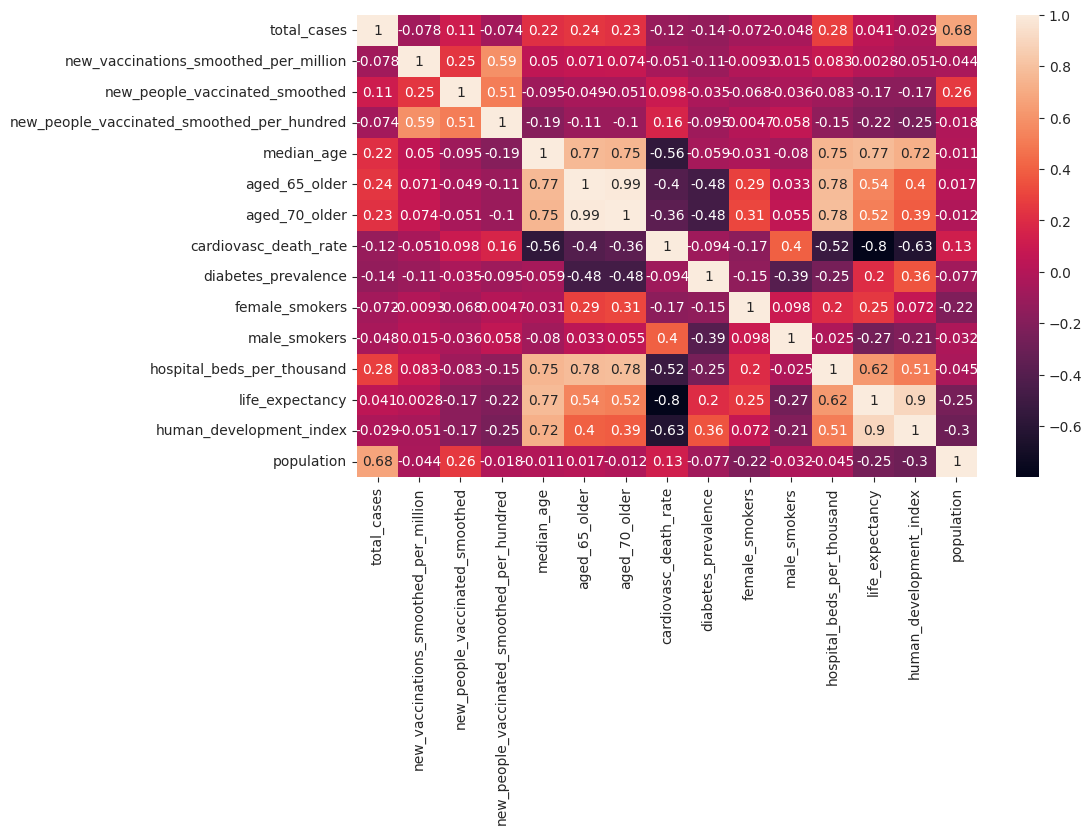

In [ ]:
#Menghitung korelasi antar variabel

corr_df = df.corr()
plt.figure(figsize=(10,6))
sns.set_style('ticks')

sns.heatmap(corr_df,annot=True)
plt.show()

<ipython-input-19-c2648e9ca2ca>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['total_cases'])


<Axes: xlabel='total_cases', ylabel='Density'>

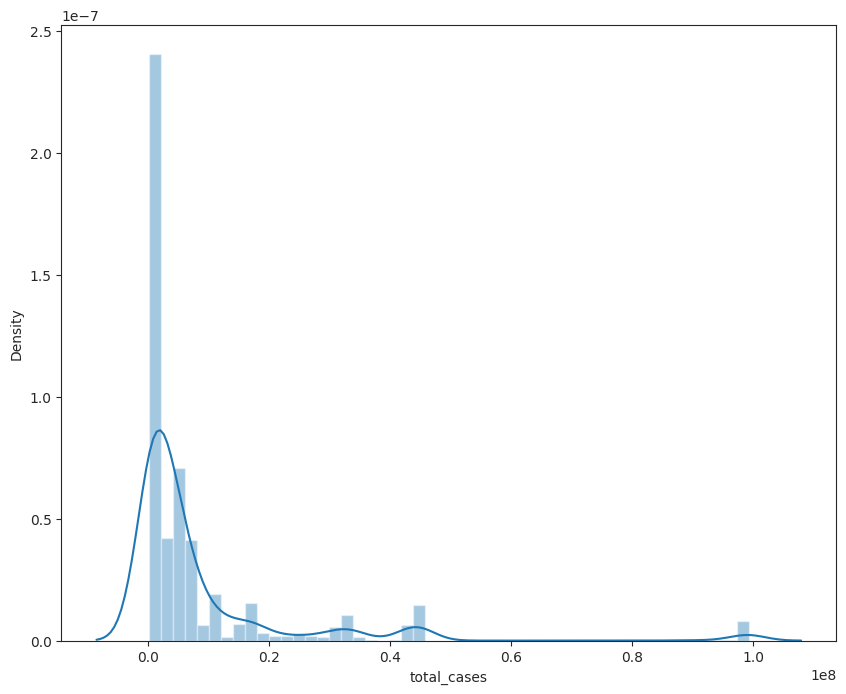

In [ ]:
#Mendeteksi distribusi data (normal atau tidak)
plt.figure(figsize=(10,8))
plt.tight_layout()
sns.distplot(df['total_cases'])

In [ ]:
def find_outlier(yourlist):
    outlier = ''
    for i in range(len(yourlist)):
        if yourlist[i] > batas_atas:
            outlier += str(yourlist[i]) + ', '
        if yourlist[i] < batas_bawah:
            outlier += str(yourlist[i]) + ', '
    return outlier

In [ ]:
#scalling
for i in df.columns.drop(['location']):
    df['{} Standard scl'.format(i)] = StandardScaler().fit_transform(df[[i]])

# **MULTIPLE LINEAR REGRESSION**

In [ ]:
#Menentukan nilai X dan Y
X = df[['new_vaccinations_smoothed_per_million','new_people_vaccinated_smoothed','new_people_vaccinated_smoothed_per_hundred', 'median_age', 'aged_65_older', 'aged_70_older', 'cardiovasc_death_rate','diabetes_prevalence', 'female_smokers', 'male_smokers', 'hospital_beds_per_thousand','life_expectancy', 'human_development_index', 'population']].values
y = df[['total_cases']].values

In [ ]:
#Menentukan nilai x dan y baru untuk data training dan data testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
#Training Model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Nilai koefisien regresi slope (beta 1, 2, dst)
regressor.coef_[0]

array([-1.08417411e+03, -4.29276081e+00,  2.68556916e+07, -2.08135549e+03,
       -2.02521986e+06,  2.66766761e+06, -1.84980718e+04, -3.45288170e+05,
        3.18964996e+04, -3.24234497e+04,  1.42213569e+06, -1.91819183e+05,
        1.31817137e+07,  3.01706770e-02])

In [ ]:
#Dataframe koefisien regresi
X_columns = df[['new_vaccinations_smoothed_per_million','new_people_vaccinated_smoothed','new_people_vaccinated_smoothed_per_hundred', 'median_age', 'aged_65_older', 'aged_70_older', 'cardiovasc_death_rate','diabetes_prevalence', 'female_smokers', 'male_smokers', 'hospital_beds_per_thousand','life_expectancy', 'human_development_index', 'population']].columns

coeff_df = pd.DataFrame(regressor.coef_[0], X_columns, columns=['Coefficient/Slope'])
coeff_df

,Coefficient/Slope
new_vaccinations_smoothed_per_million,-1.084174e+03
new_people_vaccinated_smoothed,-4.292761e+00
new_people_vaccinated_smoothed_per_hundred,2.685569e+07
median_age,-2.081355e+03
aged_65_older,-2.025220e+06
aged_70_older,2.667668e+06
cardiovasc_death_rate,-1.849807e+04
diabetes_prevalence,-3.452882e+05
female_smokers,3.189650e+04
male_smokers,-3.242345e+04


In [ ]:
#Nilai koefisien regresi intersep (beta 0)
regressor.intercept_[0]

16705617.741085265

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
#Menampilkan nilai prediksi
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df1 = df.head(10)
df1

,Actual,Predicted
0,4817300.0,8.535172e+06
1,19882393.0,2.222195e+07
2,4067581.0,4.319254e+06
3,838375.0,2.212812e+06
4,7561428.0,5.496877e+06
5,16851518.0,7.745241e+06
6,525171.0,4.548740e+06
7,6655686.0,4.539362e+07
8,829882.0,4.626727e+06
9,4918917.0,7.714641e+05


In [ ]:
#Mengukur nilai MAE, MSE, RMSE, R-square
print('Mean Absolute Error(MAE): ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error(MSE): ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error(RMSE): ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', round(metrics.r2_score(y_test, y_pred), 2))

Mean Absolute Error(MAE):  4939160.671171437
Mean Squared Error(MSE):  108588996109295.27
Root Mean Squared Error(RMSE):  10420604.402302932
R2 Score: 0.61


In [ ]:
#Uji Signifikansi
X = sm.add_constant(X)  # Menambahkan kolom konstanta (intercept)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     540.6
Date:                Tue, 24 Oct 2023   Prob (F-statistic):               0.00
Time:                        14:20:07   Log-Likelihood:                -99529.
No. Observations:                5658   AIC:                         1.991e+05
Df Residuals:                    5643   BIC:                         1.992e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.301e+07   6.86e+06      1.895      0.0

# **SUPPORT VECTOR REGRESSION**

In [ ]:
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R^2): {r2}")

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Squared Error (MSE): 316980742269304.56
R-squared (R^2): -0.13932633566019503


# **DECISION TREE REGRESSION**

In [ ]:
# Initializing the Decision Tree Regression model
model = DecisionTreeRegressor(random_state = 0)

# Fitting the Decision Tree Regression model to the data
model.fit(X_train, y_train)

# Predicting the target values of the test set
y_pred = model.predict(X_test)

# RMSE (Root Mean Square Error) dan RSquare
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R^2): {r2}")

Mean Squared Error (MSE): 7383389649133.764
R-squared (R^2): 0.9734618254299117


In [ ]:
#Kepentingan Fitur pada model
feature_importance = model.feature_importances_
for i, importance in enumerate(feature_importance):
    print(f"Fitur {i}: {importance}")

Fitur 0: 0.031901780138779805
Fitur 1: 0.11057308009324125
Fitur 2: 0.21516319373613926
Fitur 3: 0.10433483312436719
Fitur 4: 0.017231067747467303
Fitur 5: 0.055663057482003155
Fitur 6: 0.00047053828221577636
Fitur 7: 0.0012256008453517468
Fitur 8: 0.0005547813067560535
Fitur 9: 0.0031302586508883926
Fitur 10: 2.6380220160379366e-05
Fitur 11: 9.317852756916103e-08
Fitur 12: 0.0010044449607870245
Fitur 13: 0.45872089023331525


In [ ]:
from sklearn.tree import export_graphviz

# export the decision tree model to a tree_structure.dot file
# paste the contents of the file to webgraphviz.com
export_graphviz(model, out_file ='tree_structure.dot',
               feature_names =['new_vaccinations_smoothed_per_million','new_people_vaccinated_smoothed','new_people_vaccinated_smoothed_per_hundred', 'median_age', 'aged_65_older', 'aged_70_older', 'cardiovasc_death_rate','diabetes_prevalence', 'female_smokers', 'male_smokers', 'hospital_beds_per_thousand','life_expectancy', 'human_development_index', 'population'])